## 划痕全息教程

### 原理讲解

划痕全息是一种视觉效果，当光源移动时，高光会随之改变。这种效果可以通过特定的方法在三维软件中实现，例如Blender。

### 主要做法

1. 确定轮廓点

    首先，我们需要确定我们想要绘制图案的轮廓点。这些点将作为我们绘制圆弧的基准。

2. 绘制圆弧

    通过这些采样点绘制相同曲率的圆弧。这样可以确保在不同位置的高光变化是一致的。

3. 保存轨迹路径

    将绘制的轨迹路径保存为SVG格式。SVG是一种矢量图形格式，适合用于保存精确的路径数据。

4. 导入Blender

    将SVG文件导入到Blender中。可以使用快捷键`Control + J`将曲线合并。

5. 设置曲线

    在Blender中，打开曲线设置，将倒角深度设置为`0.0001`。这个设置将影响高光的显示效果。

6. 更改材质

    将材质的金属度拉满，粗糙度设置为0

7. 创建点光源

    在Blender场景中创建一个点光源。点光源的辐射半径需要缩小，以便更精细地控制高光。

8. K帧动画

    一旦高光形状符合预期，就可以对光源或者相机进行K帧（关键帧）设置，以创建动态的全息效果。

### 心形图案的参数方程：

$$
\begin{aligned} & x(t)=16 \sin ^3(t) \\ & y(t)=13 \cos (t)-5 \cos (2 t)-2 \cos (3 t)-\cos (4 t) \end{aligned} \\
$$

(30, 2)


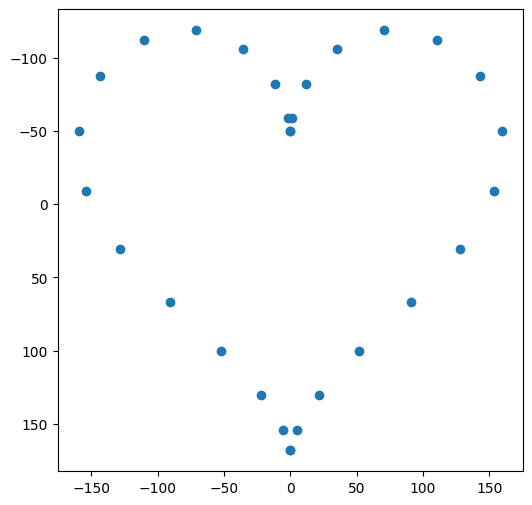

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_heart_points(num_points, size, data_list):
    
    for t in np.linspace(0, 2 * np.pi, num_points):
        x = size * 16 * np.sin(t)**3
        y = -size * (13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t))
        data_list.append((x, y))
    return np.array(data_list)


data_list = generate_heart_points(num_points=30, size=10, data_list=[])
print(data_list.shape)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_list[:, 0], data_list[:, 1])
ax.invert_yaxis()
plt.show()

### 绘制圆弧

1) r : 点到圆心的距离，设置圆心在采样点下方距离为r的位置。

2) 圆弧的范围：angle_range, 例如 pi / 4， 就是左右两边的角度各自为 pi / 4

3) 圆弧点的计算：

$$
x = center_x + r \cdot cos(\theta)
$$

$$
y = center_y + r \cdot sin(\theta)
$$

(30, 100) (30, 100)


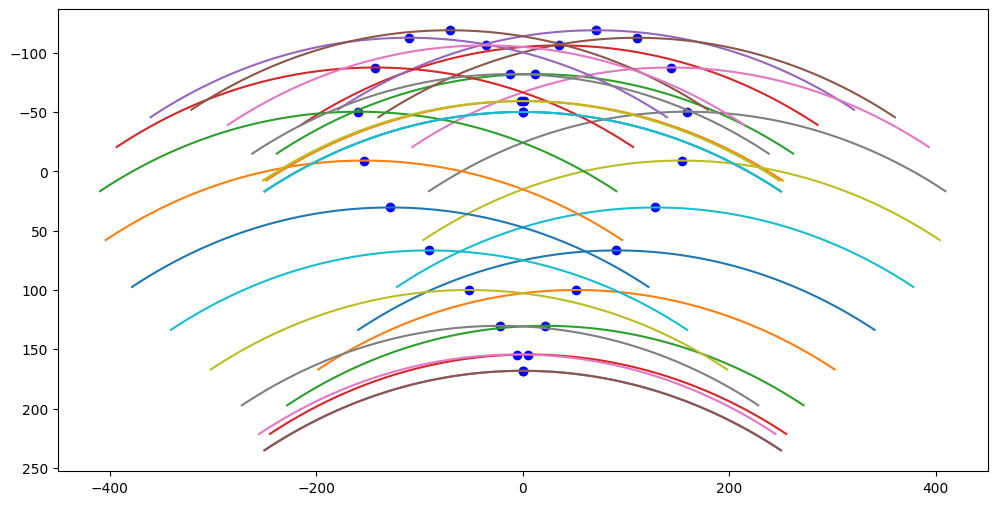

In [2]:
def draw_arc_through_point(point, radius, angle_range = np.pi / 6):

    center = point + np.array([0, radius]) # 设置圆心在采样点下方距离为r的位置。
    t = np.linspace(-np.pi / 2 - angle_range, -np.pi / 2 + angle_range, 100)
    arc_x = center[:, 0][:, None] + np.tile(radius * np.cos(t), (len(point), 1))
    arc_y = center[:, 1][:, None] + np.tile(radius * np.sin(t), (len(point), 1))

    return arc_x, arc_y, center

    
# points = data_list[0]
points = data_list

if points.ndim == 1: # 如果是一维的
    points = points[None, :]


arc_x, arc_y, center = draw_arc_through_point(points, 500)
print(arc_x.shape, arc_y.shape)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(points[:,0], points[:, 1], color='blue', label="Point")
# ax.scatter(center[:,0], center[:, 1], color='red', label="Center")
for acx, acy in zip(arc_x, arc_y):
    ax.plot(acx, acy)
ax.invert_yaxis()
plt.show()

In [ ]:
import svgwrite
import numpy as np

def generate_heart_points(num_points, size):
    data_list = []
    for t in np.linspace(0, 2 * np.pi, num_points):
        x = size * 16 * np.sin(t)**3
        y = -size * (13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t))
        data_list.append((x, y))
    return np.array(data_list)

def draw_arc_through_point(points, radius, angle_range=np.pi / 2):
    center = points + np.array([0, radius])  # 圆心位置
    t = np.linspace(-np.pi / 2 - angle_range, -np.pi / 2 + angle_range, 100)
    arc_x = center[:, 0][:, None] + np.tile(radius * np.cos(t), (len(points), 1))
    arc_y = center[:, 1][:, None] + np.tile(radius * np.sin(t), (len(points), 1))
    return arc_x, arc_y

# 生成路径和弧线
data_list = generate_heart_points(num_points=100, size=10)
arc_x, arc_y = draw_arc_through_point(data_list, radius=500)

# 创建 SVG 文件
svg_filename = "scratches.svg"
dwg = svgwrite.Drawing(svg_filename, profile='tiny', size=("1000px", "800px"))

# 添加弧线
for acx, acy in zip(arc_x, arc_y):
    arc_path = svgwrite.path.Path(stroke="black", fill="none", stroke_width=1)
    for i, (x, y) in enumerate(zip(acx, acy)):
        if i == 0:
            arc_path.push(f"M{x},{y}")
        else:
            arc_path.push(f"L{x},{y}")
    dwg.add(arc_path)

# 保存 SVG 文件
dwg.save()
print(f"SVG file saved as {svg_filename}")


SVG file saved as scratches.svg


## 生成2025的路径

In [3]:
import numpy as np

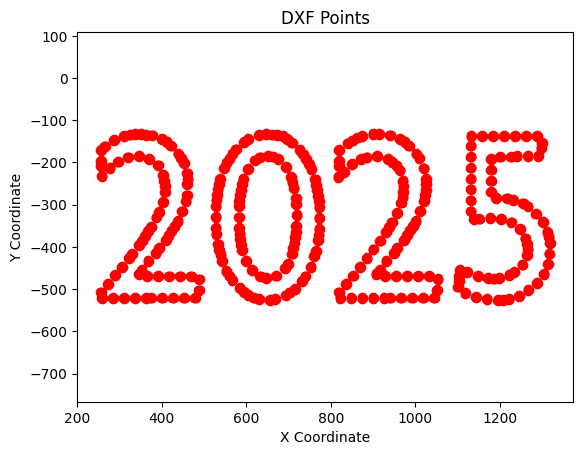

In [1]:
import ezdxf
import matplotlib.pyplot as plt

# 读取DXF文件
doc = ezdxf.readfile("contours_and_circles.dxf")  # 替换为你的文件名
msp = doc.modelspace()

# 提取点
points = []
for entity in msp:
    if entity.dxftype() == 'LINE':
        start_point = entity.dxf.start
        end_point = entity.dxf.end
        points.append(start_point)
        points.append(end_point)
# print(points)


# 提取x和y坐标
if points:
    x, y, z = zip(*points)
    # 使用matplotlib绘制散点图
    plt.scatter(x, y, color='red')
    plt.title('DXF Points')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axis('equal')
    plt.show()
else:
    print("No points found in the DXF file.")

In [5]:
linex = np.array(x)
liney = np.array(y)

print(linex.shape, liney.shape)

data_points = []

for i in range(0, len(x), 6):
    data_points.append([linex[i], liney[i]])

data_points = np.array(data_points)
data_points.shape

(1268,) (1268,)


(212, 2)

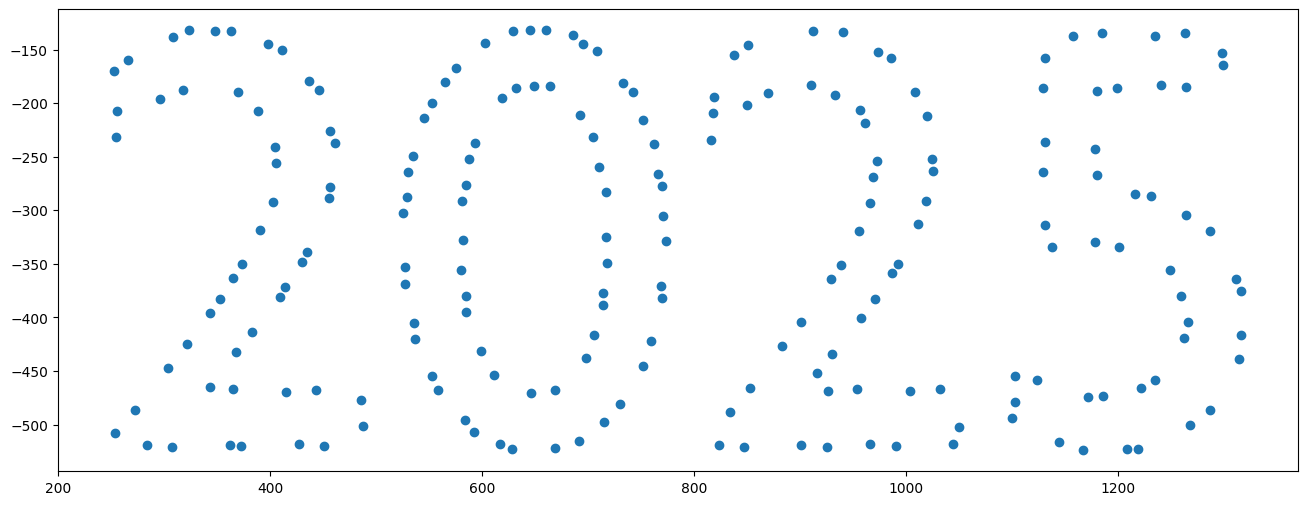

In [6]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_points[:, 0], data_points[:, 1])
# ax.invert_yaxis()
plt.show()

(212, 100) (212, 100)


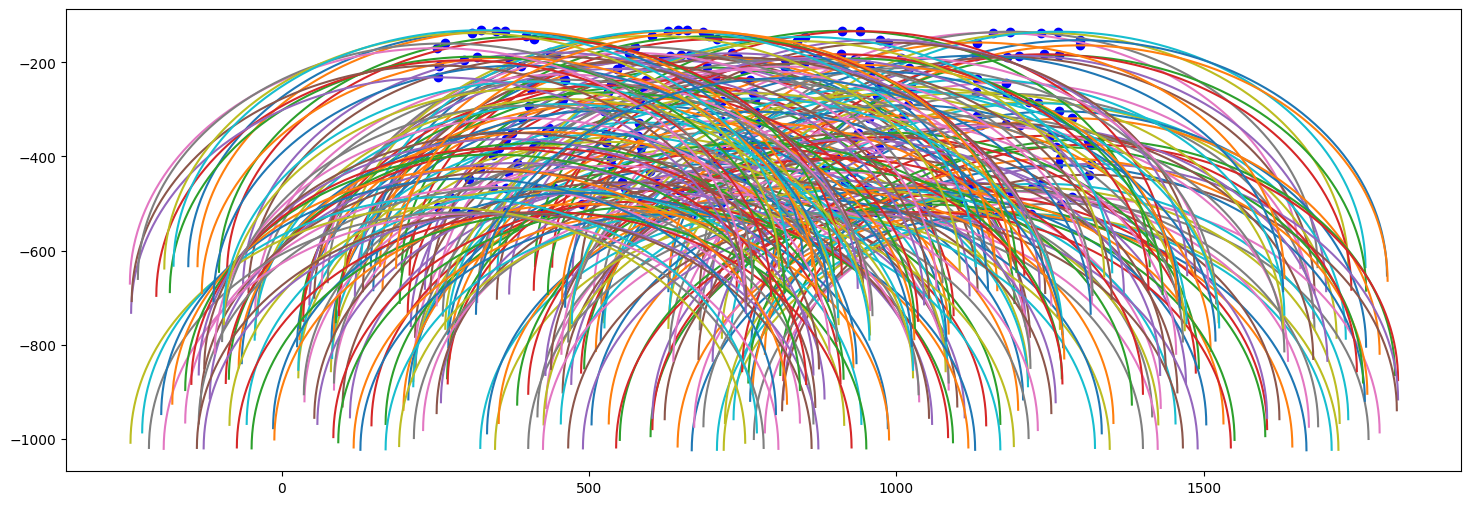

In [7]:
def draw_arc_through_point(point, radius, angle_range = np.pi / 6):

    center = point - np.array([0, radius]) # 设置圆心在采样点下方距离为r的位置。
    t = np.linspace(np.pi / 2 - angle_range, np.pi / 2 + angle_range, 100)
    arc_x = center[:, 0][:, None] + np.tile(radius * np.cos(t), (len(point), 1))
    arc_y = center[:, 1][:, None] + np.tile(radius * np.sin(t), (len(point), 1))

    return arc_x, arc_y, center

    
# points = data_list[0]
points = data_points

if points.ndim == 1: # 如果是一维的
    points = points[None, :]


arc_x, arc_y, center = draw_arc_through_point(points, 500, np.pi / 2)
print(arc_x.shape, arc_y.shape)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(points[:,0], points[:, 1], color='blue', label="Point")
# ax.scatter(arc_x[:,70], arc_y[:, 70], color='blue', label="Point")
# ax.scatter(center[:,0], center[:, 1], color='red', label="Center")
# plt.plot(arc_x, arc_y, label="Arc")
for acx, acy in zip(arc_x, arc_y):
    ax.plot(acx, acy)
# ax.invert_yaxis()
plt.show()

In [65]:
# 创建 SVG 文件
svg_filename = "scratches_2025.svg"
dwg = svgwrite.Drawing(svg_filename, profile='tiny', size=("1000px", "800px"))

# 添加弧线
for acx, acy in zip(arc_x, arc_y):
    arc_path = svgwrite.path.Path(stroke="black", fill="none", stroke_width=1)
    for i, (x, y) in enumerate(zip(acx, acy)):
        if i == 0:
            arc_path.push(f"M{x},{y}")
        else:
            arc_path.push(f"L{x},{y}")
    dwg.add(arc_path)

# 保存 SVG 文件
dwg.save()
print(f"SVG file saved as {svg_filename}")

SVG file saved as scratches_2025.svg
